## Connected components labeling

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

In [2]:
def show(image, title=None):
    plt.imshow(image, 'gray')
    plt.title(title)
    plt.axis('off')
    plt.show()

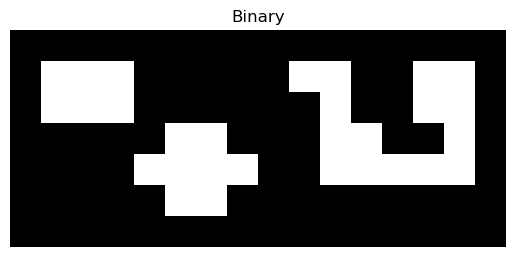

In [3]:
image = cv2.imread("images/CrossBar.png", 0)
thresholded = np.where(image > 100, 255, 0)
show(thresholded, "Binary")

In [4]:
labels, stats, _ , _ = cv2.connectedComponentsWithStats(image) #It return three or four things : label,stats, 

In [5]:
labels    # it uses connected components label algorithm

4

In [6]:
stats

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 2, 2, 0, 0, 2, 2, 0],
       [0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 2, 0],
       [0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 2, 2, 0, 0, 2, 0],
       [0, 0, 0, 0, 3, 3, 3, 3, 0, 0, 2, 2, 2, 2, 2, 0],
       [0, 0, 0, 0, 0, 3, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], dtype=int32)

## Area Calculation

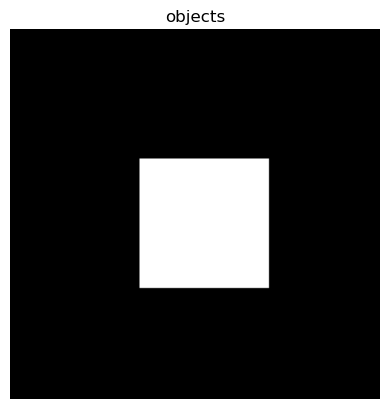

In [7]:
img = np.zeros((200, 200), dtype=np.int8)
img[70:140, 70:140] = 1
show(img, 'objects')

area = 0
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i, j] == 1:
            area += 1

In [8]:
area

4900

In [9]:
labels, stats, _ , _ = cv2.connectedComponentsWithStats(img) #It return three or four things : label,stats, 

In [10]:
stats

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

## Local Enhancement using statistical parameters

For the direct calculation of transformation function 
(adaptive transformation function

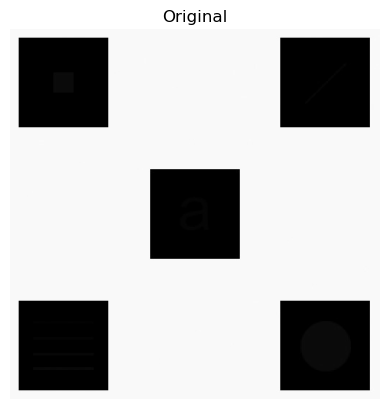

C:\Users\PC\AppData\Local\Temp\ipykernel_4420\2545898641.py:13: RuntimeWarning: divide by zero encountered in scalar divide
  A = (k*MG)/ds
C:\Users\PC\AppData\Local\Temp\ipykernel_4420\2545898641.py:15: RuntimeWarning: invalid value encountered in scalar multiply
  result[i,j] = ((image[i,j] - ms ) * A ) + ms
C:\Users\PC\AppData\Local\Temp\ipykernel_4420\2545898641.py:15: RuntimeWarning: invalid value encountered in cast
  result[i,j] = ((image[i,j] - ms ) * A ) + ms


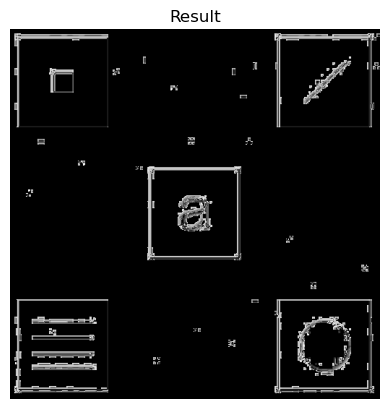

In [11]:
image = cv2.imread('images/IMG-20231017-WA0004.jpg', 0)
show(image, 'Original')
result = image.copy()*0
k =0.5

MG = image.mean() # global mean

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        ms = image[i:i+3, j:j+3].mean() # mean of sub region
        ds = image[i:i+3, j:j+3].std() # deviation of sub image
        
        A = (k*MG)/ds
        
        result[i,j] = ((image[i,j] - ms ) * A ) + ms
        
        
            

show(result, "Result")



 Using them in defining ranges for different transfer
functions 

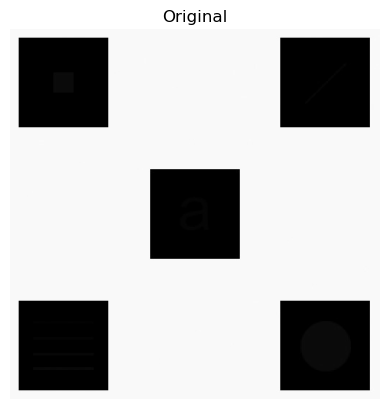

KeyboardInterrupt: 

In [12]:
image = cv2.imread('images/IMG-20231017-WA0004.jpg', 0)
show(image, 'Original')
MG = image.mean() # global mean
DG = image.std()  # global standard deviation
result = image.copy()*0
k0, k1, k2, k3 = 0,0.1,0,0.1
e= 22.8

for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        ms = image[i:i+5, j:j+5].mean()   # for instance we select 3 x 3 region
        ds = image[i:i+5, j:j+5].std() # deviation of sub image
#         if ms <= k0*MG and k1*DG <= ds and ds <= k2*DG:
        if (ms > k0*MG and ms<k1*MG) and (ds >= k2*DG and ds<= k3*DG):
            result[i,j] = image[i,j]*e
        else:
            result[i,j] = image[i,j]
            
show(result, "Result")